## 177​​ - Changing Figure Colors on a Skew-T

[Youtube](https://www.youtube.com/watch?v=NLPz0tngPYk)

[Hodograph Inset](https://unidata.github.io/MetPy/latest/examples/plots/Hodograph_Inset.html)

Layout a Skew-T plot with a hodograph inset into the plot.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from metpy.units import units

Upper air data can be obtained using the siphon package, but for this example we will use
some of MetPy's sample data.



In [2]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

df = pd.read_fwf(get_test_data('may4_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

We will pull the data out of the example dataset into individual variables and
assign units.



In [3]:
hght = df['height'].values * units.hPa
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

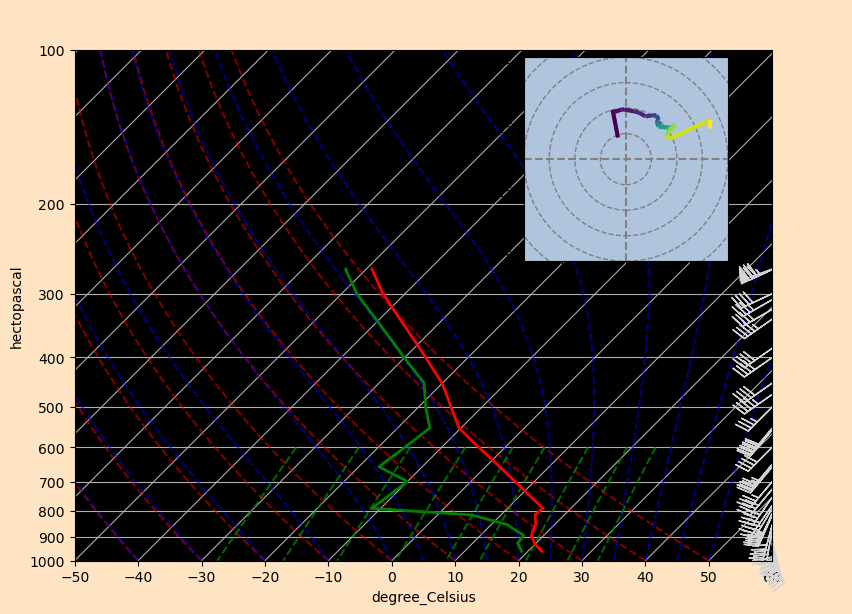

In [4]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
# add_metpy_logo(fig, 115, 100)

# Grid for plots
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r', linewidth = 2)
skew.plot(p, Td, 'g', linewidth = 2)
skew.plot_barbs(p, u, v, color = 'lightgray')
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats(color = 'tab:olive')
skew.plot_moist_adiabats(color = 'tab:cyan')
skew.plot_mixing_lines(color = 'magenta')

# Good bounds for aspect ratio
skew.ax.set_xlim(-50, 60)

# Change colors of plot
skew.ax.set_facecolor('black')
fig.patch.set_facecolor('bisque')

# Create a hodograph
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=1)
ax_hod.set_facecolor('lightsteelblue')
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, hght)

# Show the plot
plt.show()